In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


QUESTION 1 (Hypothesis): The probability of a winner having a first serve percentage of over 60% and a second serve percentage of over 30% in a randomly selected match from the dataset should lie in the range of 0.2 to 0.6

Probability that randomly selected match from the dataset,
the winner will have a first serve percentage of over 60% and second serve of over 30% is 0.4126984126984127 



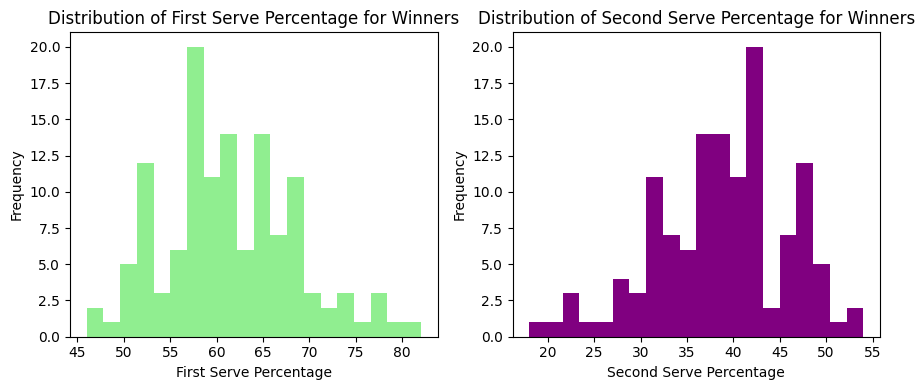

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("/content/drive/MyDrive/AusOpen-men-2013.csv")

data1=data[data["FSP.1"]>60]
data1=data1[data1["SSP.1"]>30]

probability=len(data1)/len(data)
print('''Probability that randomly selected match from the dataset,
the winner will have a first serve percentage of over 60% and second serve of over 30% is''',probability,"\n")

fig,axs=plt.subplots(1,2,figsize=(9,4))
axs[0].hist(data["FSP.1"],bins=20,color="lightgreen")
axs[0].set_xlabel("First Serve Percentage")
axs[0].set_ylabel("Frequency")
axs[0].set_title("Distribution of First Serve Percentage for Winners")

axs[1].hist(data["SSP.1"],bins=20,color="purple")
axs[1].set_xlabel("Second Serve Percentage")
axs[1].set_ylabel("Frequency")
axs[1].set_title("Distribution of Second Serve Percentage for Winners")
plt.tight_layout()
plt.show()

---

QUESTION 2 : What is the probability that a player wins a match when they have hit more aces (ACE) than their opponent?

Probability of player wins a match considering that she hit more aces than the opponent: 0.5245901639344263 



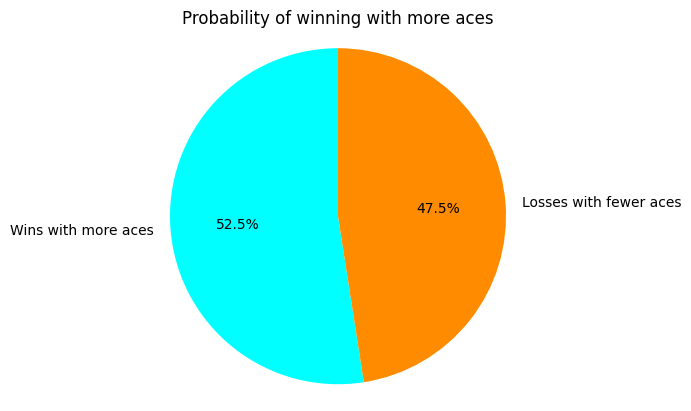

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('/content/drive/MyDrive/AusOpen-women-2013.csv')

aces=df[(df['ACE.1']!=df['ACE.2'])]
win_aces=(aces['ACE.1']>aces['ACE.2']).sum()
probability=win_aces/len(aces)
print("Probability of player wins a match considering that she hit more aces than the opponent:",probability,"\n")

labels=['Wins with more aces','Losses with fewer aces']
sizes=[probability,1-probability]
colors=['cyan','darkorange']
plt.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%',startangle=90)
plt.axis('equal')
plt.title('Probability of winning with more aces')
plt.show()

---

QUESTION 3: If we assume that the distribution of total points won by a player (TPW) is approximately normal, what is the probability that a player will win the match if they have a TPW of 100?

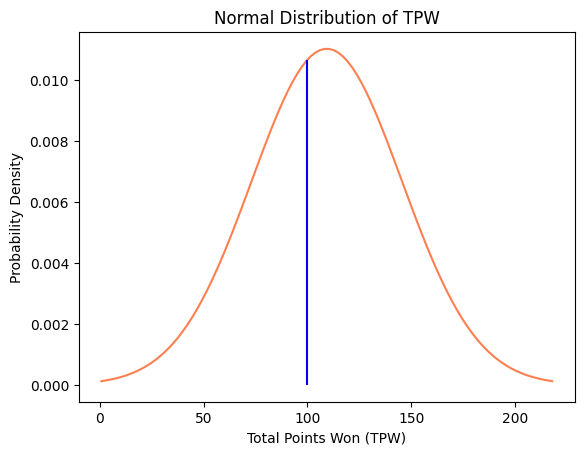

The probability of winning with a TPW of 100 is 60.14%


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

df=pd.read_csv('/content/drive/MyDrive/FrenchOpen-men-2013.csv')

mu=df['TPW.1'].mean()
sigma=df['TPW.1'].std()

tpw=100
p_win=1-norm.cdf(tpw,mu,sigma)

x=np.linspace(mu-3*sigma,mu+3*sigma,100)
plt.plot(x,norm.pdf(x,mu,sigma),color="coral")
plt.vlines(tpw,ymin=0,ymax=norm.pdf(tpw,mu,sigma),colors='blue')
plt.xlabel('Total Points Won (TPW)')
plt.ylabel('Probability Density')
plt.title('Normal Distribution of TPW')
plt.show()
print(f"The probability of winning with a TPW of {tpw} is {p_win:.2%}")

---

QUESTION 4 : What is the probability that a women's match in the 2013 French Open will end with the most common final game score, and how many matches actually ended with that score?

The most common final game score for women's matches in the 2013 French Open is 2
The number of matches that ended with that score is 55
The probability of a match ending with this score is 0.4330708661417323 



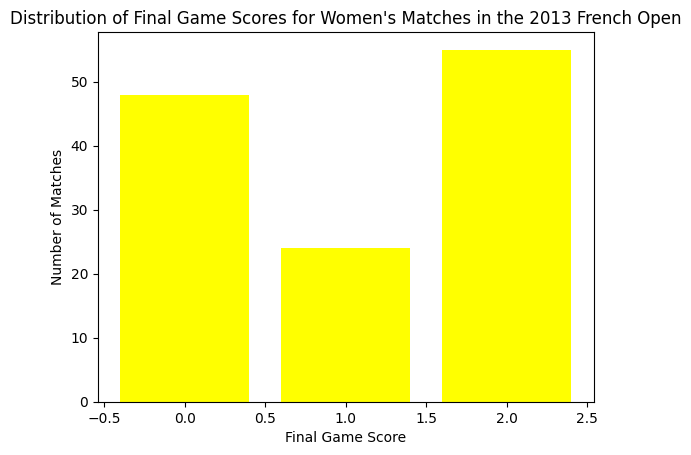

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data=pd.read_csv("/content/drive/MyDrive/FrenchOpen-women-2013.csv")

score_count=data["FNL.1"].value_counts()
probabilities=score_count/score_count.sum()

common_score=score_count.idxmax()
common_count=score_count.max()

print("The most common final game score for women's matches in the 2013 French Open is",common_score)
print("The number of matches that ended with that score is",common_count)
print("The probability of a match ending with this score is",probabilities[common_score],"\n")

plt.bar(score_count.index, score_count.values,color="yellow")
plt.xlabel("Final Game Score")
plt.ylabel("Number of Matches")
plt.title("Distribution of Final Game Scores for Women's Matches in the 2013 French Open")
plt.show()

---

QUESTION 5 : Is there a pattern in the distribution of break points created and won by players that could indicate clusters?

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


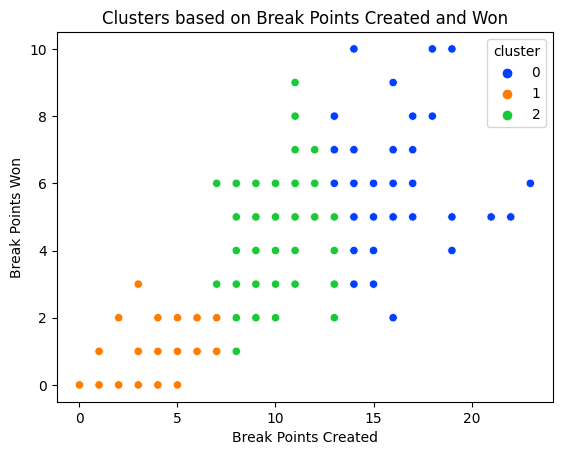

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df=pd.read_csv("/content/drive/MyDrive/USOpen-men-2013.csv")

df=df.rename(columns={'BPW.1': 'BPC', 'BPC.1': 'BPW', 'NPA.1': 'NPW', 'NPW.1': 'NPA'})
X=df[['BPC', 'BPW']]
kmeans=KMeans(n_clusters=3)
kmeans.fit(X)
df['cluster']=kmeans.labels_

sns.scatterplot(data=df,x='BPC',y='BPW',hue='cluster',palette='bright')
plt.title('Clusters based on Break Points Created and Won')
plt.xlabel('Break Points Created')
plt.ylabel('Break Points Won')
plt.show()

---

QUESTION 6 : What is the joint probability that a player wins the match given that she wins at least 70% of her first serves and hits at least 10 winners?

Joint probability of winning the match given winning at least 70% of first serves and hitting at least 10 winners: 0.0789 



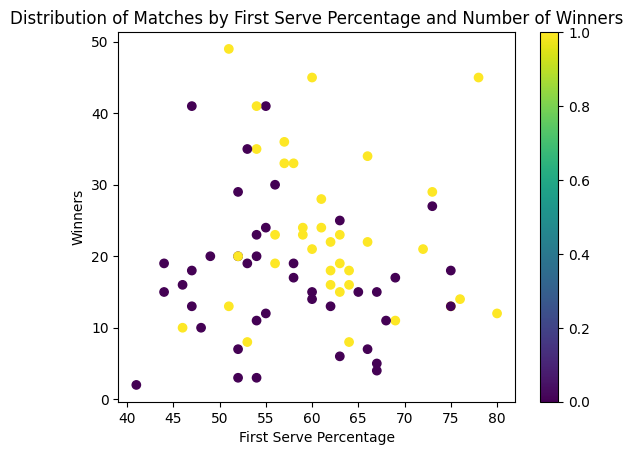

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv("/content/drive/MyDrive/USOpen-women-2013.csv")

result=df[(df["FSP.1"]>=70) & (df["WNR.1"]>=10)]
win=result[result["Result"]==1]

joint_prob=len(win)/len(df)
print("Joint probability of winning the match given winning at least 70% of first serves and hitting at least 10 winners: {:.4f}".format(joint_prob),"\n")

plt.scatter(df["FSP.1"],df["WNR.1"],c=df["Result"],cmap='viridis')
plt.xlabel("First Serve Percentage")
plt.ylabel("Winners")
plt.title("Distribution of Matches by First Serve Percentage and Number of Winners")
plt.colorbar()
plt.show()

---

QUESTION 7 : What is the probability of players who first name starts with A or M and have committed at least 3 double faults in a single match in Wimbledon Men's Tournament 2013?

Probability of players whose first name starts with A or M and
Have committed at least 3 double faults: 0.9 



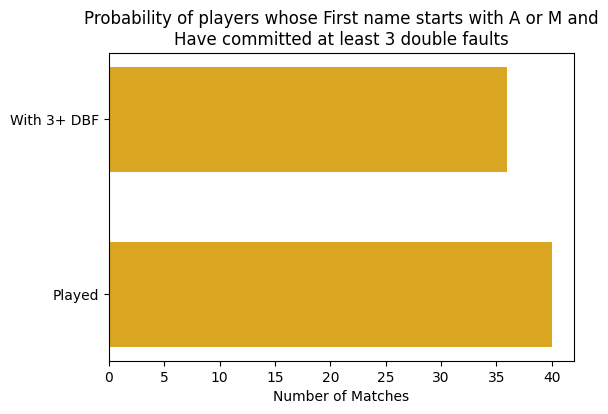

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data=pd.read_csv('/content/drive/MyDrive/Wimbledon-men-2013.csv')

players=data[data['Player1'].str.startswith(('A','M')) | data['Player2'].str.startswith(('A','M'))]
matches=players[(players['DBF.1']>=3) | (players['DBF.2']>=3)]

probability=len(matches)/len(players)
print('''Probability of players whose first name starts with A or M and
Have committed at least 3 double faults:''',probability,"\n")
count={'Played':len(players),'With 3+ DBF':len(matches)}

plt.figure(figsize=(6,4))
plt.barh(list(count.keys()),list(count.values()),color="goldenrod",height=0.6)
plt.title('''Probability of players whose First name starts with A or M and
Have committed at least 3 double faults''')
plt.xlabel("Number of Matches")
plt.show()

---

QUESTION 8 (Hypothesis): Even if the player have less net points than her opponent she have a small chance of winning the match.

Probability of Winning Given Less Net Points is: 0.23893805309734514 



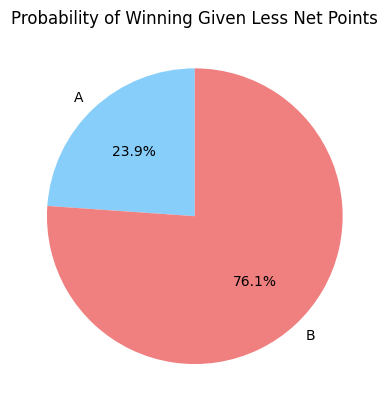

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data=pd.read_csv('/content/drive/MyDrive/Wimbledon-women-2013.csv')
data=data.rename(columns={'NPW.1':'NPA.1','NPA.1':'NPW.1','NPW.2':'NPA.2','NPA.2':'NPW.2'})

win_less= data[(data['NPW.1']<data['NPW.2']) & (data['FNL.1']==1) | (data['NPW.1']>data['NPW.2']) & (data['FNL.1']==0)]
less= data[(data['NPW.1']<data['NPW.2']) | (data['NPW.1']>data['NPW.2'])]

probability=len(win_less)/len(less)
print('Probability of Winning Given Less Net Points is:',probability,"\n")

pie=[probability,1-probability]
plt.pie(pie,labels=['A','B'],colors=['lightskyblue','lightcoral'],autopct='%1.1f%%',startangle=90)
plt.title('Probability of Winning Given Less Net Points')
plt.show()